### Using dark emulator to describe the DMASS clustering/lensing signals

The instructions for installation are one the README of the Github repo: https://github.com/DarkQuestCosmology/dark_emulator_public
and also described on the documentation:
https://dark-emulator.readthedocs.io/en/latest/

For my given conda set-up, conda install failed, but pip worked. Check that it has properly installed by running `import dark_emulator` in ipython or ipython notebook. I currently get a message that `colossus is not installed.` but not sure yet whether this will impact our usage of dark emulator.

Sujeong has produced blinded Y1 DMASS correlation measurements, which live in
`/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale` so these are what we will try to fit with the dark emulator.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import dark_emulator
from dark_emulator import model_hod

Populating the interactive namespace from numpy and matplotlib
colossus is not installed.


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (10,6)

### Testing dark emulator
We will eventually want to fit HOD parameters to a galaxy-galaxy lensing signal in DeltaSigma(R), so the first part of one of their notebooks shows the steps for setting these parameters and plotting them. This is reproduced below.

In [3]:
hod = model_hod.darkemu_x_hod({"fft_num":8})

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
cparam = np.array([0.02225,0.1198,0.6844,3.094,0.9645,-1.])
hod.set_cosmology(cparam)

gparam = {"logMmin":13.13, "sigma_sq":0.22, "logM1": 14.21, "alpha": 1.13, "kappa": 1.25, # HOD parameters
           "poff": 0.2, "Roff": 0.1, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
           "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
           "alpha_inc": 0.44, "logM_inc": 13.57} # incompleteness parameters. For details, see More et al. (2015)
hod.set_galaxy(gparam)

INFO:root:Got same cosmology. Keep quantities already computed.


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0 to DejaVu Sans ('/users/PCON0003/cond0080/.conda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0 to STIXGeneral ('/users/PCON0003/cond0080/.conda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXGeneral:style=italic:variant=normal:weight=normal:stretch=normal:size=18.0 to STIXGeneral ('/users/PCON0003/cond0080/.conda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=bold:stretch=

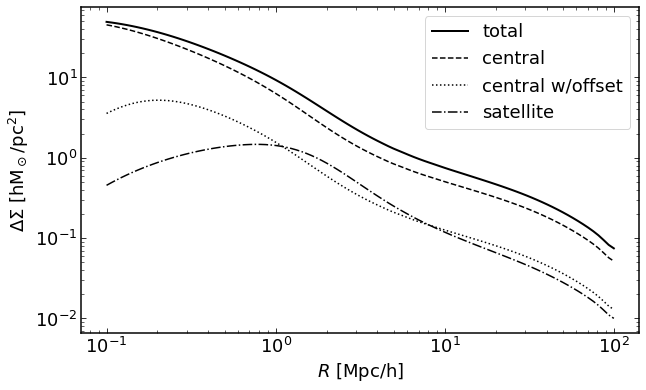

In [5]:
# Currently getting a lot of matplotlib debug messages I need to figure out
redshift = 0.55
r = np.logspace(-1,2,100)

plt.figure(figsize=(10,6))

plt.loglog(r, hod.get_ds(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_ds_cen(r, redshift), "--", color = "k", label = "central")
plt.loglog(r, hod.get_ds_cen_off(r, redshift), ":", color = "k", label = "central w/offset")
plt.loglog(r, hod.get_ds_sat(r, redshift), "-.", color = "k", label = "satellite")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$\Delta\Sigma$ [hM$_\odot$/pc$^2$]")
plt.legend()